### Analysis of Higher Order Trend Filtering

In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
sys.path.append("../")
sys.path.append("../../")


from estimators.trend_filtering.trend_filter import Trend_Filter
from estimators.cv_base_estimator import cv_base_estimator

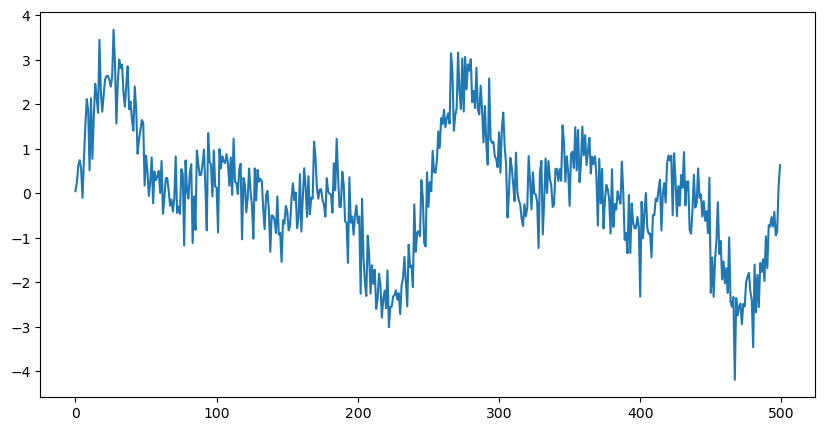

In [5]:
def generate_fake_data(n):
    """Generate fake data to test cross validation"""
    t=np.linspace(0, 4*np.pi, n)

    x=np.sin(t)+ np.sin(2*t) + np.sin(3*t)

    return (x + np.random.normal(0, 0.5, n)),x,t

x,true_fun,t=generate_fake_data(500)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, label="Noisy Signal")



### Simple Case of Linear TF

In [6]:
tf=Trend_Filter(t,x,1,'primal_dual')

cv_base_estimator(tf)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.2931390093331923
Performing cross validation for lambda = 0.56596281956668
Performing cross validation for lambda = 1.0927031303697494
Performing cross validation for lambda = 2.109679452148495
Performing cross validation for lambda = 4.073153326934757
Performing cross validation for lambda = 7.864027877706189
Performing cross validation for lambda = 15.183060763361915
Performing cross validation for lambda = 29.31390093331923
Performing cross validation for lambda = 56.596281956668
Performing cross validation for lambda = 109.27031303697495
Performing cross validation for lambda = 210.9679452148493
Performing cross validation for lambda = 407.31533269347574
Performing cross validation for lambda = 786.4027877706189
Performing cross validation for lambda = 1518.30607633619
Performing cross validation for lambda = 2931.390093331923
Performing  1 out of 3 iterations of cross validation
Perfor

{'lambda_': 0.5146789268027768}

In [7]:


sol=tf.y_hat

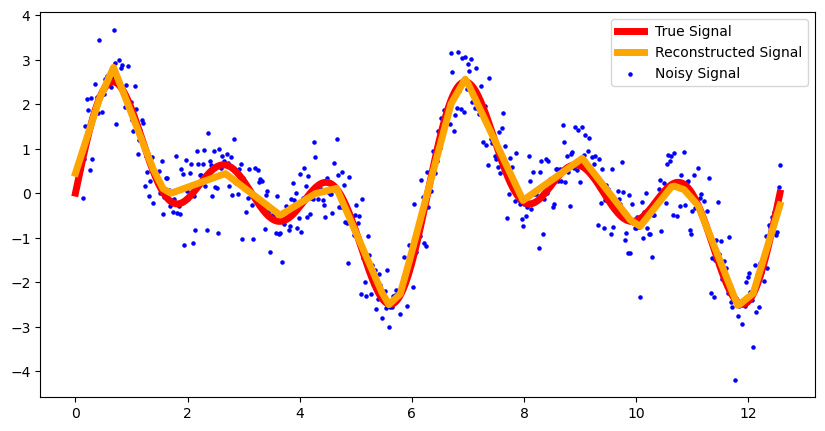

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(t, true_fun, label="True Signal",color="red",lw=5)
ax.plot(t, sol, label="Reconstructed Signal",color="orange",lw=5)
ax.scatter(t, x, label="Noisy Signal",s=5,color="blue")
ax.legend()


In [9]:
tf2=Trend_Filter(t,x,2,'primal_dual')

cv_base_estimator(tf2)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 41.77340106666931
Performing cross validation for lambda = 80.65181056714754
Performing cross validation for lambda = 155.71426749231384
Performing cross validation for lambda = 300.6371826021294
Performing cross validation for lambda = 580.4395256677901
Performing cross validation for lambda = 1120.653273960873
Performing cross validation for lambda = 2163.642730901838
Performing cross validation for lambda = 4177.34010666693
Performing cross validation for lambda = 8065.181056714754
Performing cross validation for lambda = 15571.426749231383
Performing cross validation for lambda = 30063.718260212914
Performing cross validation for lambda = 58043.952566779015
Performing cross validation for lambda = 112065.3273960873
Performing cross validation for lambda = 216364.27309018356
Performing cross validation for lambda = 417734.01066669304
Performing  1 out of 3 iterations of cross validation
Pe

{'lambda_': 7.128287849833039}

In [10]:


sol=tf2.y_hat

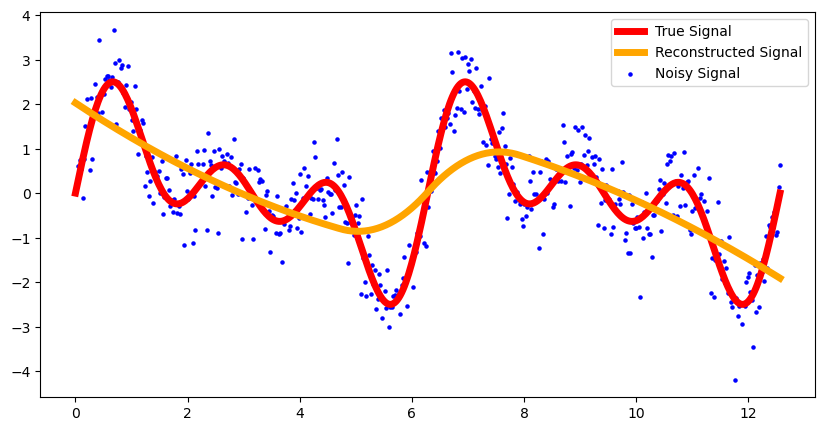

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(t, true_fun, label="True Signal",color="red",lw=5)
ax.plot(t, sol, label="Reconstructed Signal",color="orange",lw=5)
ax.scatter(t, x, label="Noisy Signal",s=5,color="blue")
ax.legend()

### Cubic Trend Filtering

Utilize a subset of data for increased stability


In [14]:
tf3=Trend_Filter(t[:100],x[:100],3,'primal_dual')

cv_base_estimator(tf3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.6616783256937409
Performing cross validation for lambda = 1.2775008406681765
Performing cross validation for lambda = 2.4664679717244904
Performing cross validation for lambda = 4.762004111371754
Performing cross validation for lambda = 9.193990522758142
Performing cross validation for lambda = 17.750816621663265
Performing cross validation for lambda = 34.27146133726834
Performing cross validation for lambda = 66.16783256937408
Performing cross validation for lambda = 127.75008406681764
Performing cross validation for lambda = 246.64679717244906
Performing cross validation for lambda = 476.20041113717485
Performing cross validation for lambda = 919.3990522758141
Performing cross validation for lambda = 1775.0816621663266
Performing cross validation for lambda = 3427.14613372683
Performing cross validation for lambda = 6616.783256937408
Performing  1 out of 3 iterations of cross validation


{'lambda_': 0.16509659578163194}

In [19]:


newtf3=Trend_Filter(t,x,3,'primal_dual')


newtf3.update_params({"lambda_": tf3.hypers["lambda_"]})

sol=newtf3.y_hat

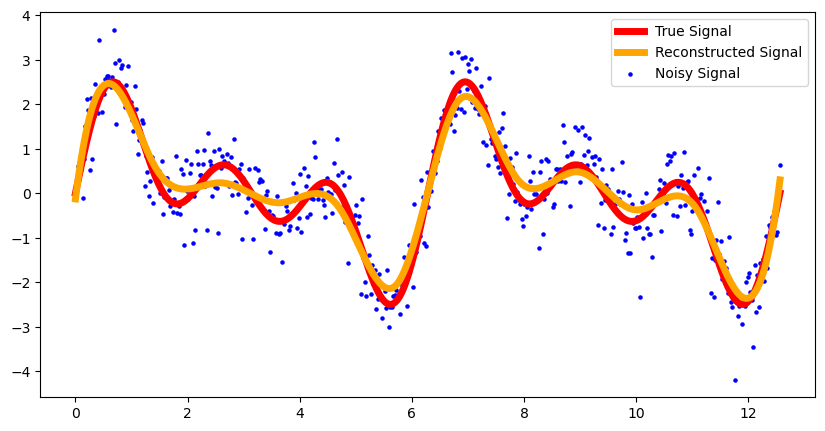

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(t, true_fun, label="True Signal",color="red",lw=5)
ax.plot(t, sol, label="Reconstructed Signal",color="orange",lw=5)
ax.scatter(t, x, label="Noisy Signal",s=5,color="blue")
ax.legend()
